# Oscilaciones longitudinales

[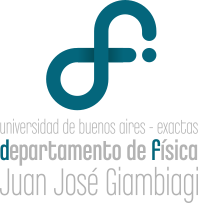](https://www.df.uba.ar/)

Adaptado de notebook producido por María Luz Martínez Ricci, 2.o cuat. 2020  


[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab, mlab, pyplot

from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs

from pylab import *
from numpy import *

Para poder graficar, primero necesitamos las condiciones iniciales del problema (a partir de ahora las llamaremos C.I.) que por comodidad tomaremos que 

**(CI 1)** $x(t=0)= x_0 = 0.1l$,

**(CI 2)** $\dot x(t=0)=0$

De las cuentas que hicimos en clase podemos ver la la solución para estas **C.I.** es:

$y(t)=0.1l \sin (\omega t) $


Veamos de graficar....

Primero vamos a darle valores (razonables) a los parámetros del problema y generamos un vector de N "tiempos" equispaciados.

In [2]:
l= 0.3 #m
A = 0.1*l #m 
k = 15 #N/m
m = 1 #kg

omega=np.sqrt(2*k/m)

t= np.linspace(0,5,250) # aca le estamos diciendo que genere equispaciadamente 250 tiempos entre 0 y 5seg


Ahora le decimos como es la solución que hallamos:

In [3]:
psi_l=A*np.sin(omega*t+pi/2)+l 

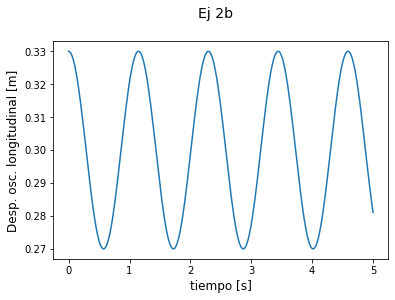

In [4]:
# en este bloque armamos la gráfica
plt.suptitle('Ej 2b', 
                 fontsize=14, y=1)
plt.xlabel('tiempo [s]', fontsize=12)
plt.ylabel('Desp. osc. longitudinal [m]', fontsize=12)
plt.plot(t, psi_l);


**OSCILACIONES TRANSVERSALES**

Para poder graficar el caso trasnversal, volvemos a usar las mismas C.I. anteriores

**(CI 1)** $y(t=0)=0.1l$,

**(CI 2)** $\dot y(t=0)=0$

De **CI 2** pueden probar que $A=B$ y usando ese resultado y **CI 1** checkeen que A=0.05l, por lo que la solución para estas condiciones iniciales queda:

$y(t)=0.05l (e^{i \sqrt{\frac{2k'}{m}}t} + e^{-i \sqrt{\frac{2k'}{m}}t}) $


Volvemos a definir los parametros para ESTE problema

In [5]:
l= 0.3 #m
l0 = 0.*l #m  #recuerden que l es mayor que l0
A_t = 0.05*l #m 
k = 15 #N/m
m = 1 #kg
kp = k * (1- l0/l)
lamb=np.sqrt(2*kp/m)

Ahora le decimos como es la solución que hallamos:

In [6]:
psi_t=A_t*(np.exp(1j*lamb*t)+np.exp(-1j*lamb*t))  #notar que para incluir la constante imaginaria i en python debemos escribir '1j'


/home/vbettachini/bin/jupyter/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


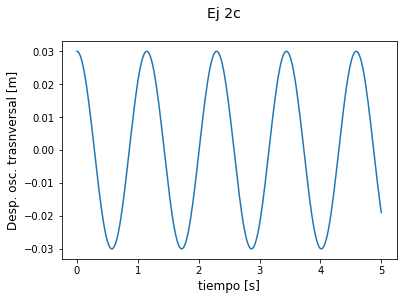

In [7]:
plt.suptitle('Ej 2c', 
                 fontsize=14, y=1)
plt.xlabel('tiempo [s]', fontsize=12)
plt.ylabel('Desp. osc. trasnversal [m]', fontsize=12)
plt.plot(t, psi_t)

Bien, antes de analizar el resultado que obtuvimos, veamos que es el mensaje que nos tira el compilador... 
Lo que nos esta diciendo es: "OJO! estas pidiendome que grafique una función compleja pero yo sólo puedo graficarte la parte real"... Ahora, ¿el desplazamiento que obtenemos es realmente una función compleja? ¿O solo usa los complejos para calcularla? Si hicimos bien las cosas (y el Ej 1 de la guía) podemos probar MUY fácilmente que la solucion que hallamos no es más que un coseno con fase cero por las condiciones iniciales pedidas, entonces la Eq. (5) no debería tener parte imaginaria... Para eso pidámosle al notebook que grafique la parte real e imaginaria por separado.

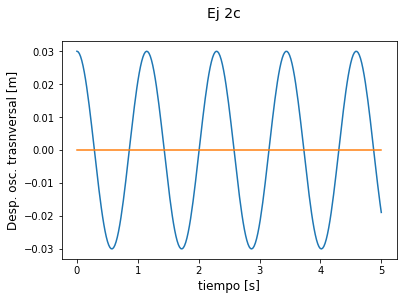

In [8]:
plt.suptitle('Ej 2c', 
                 fontsize=14, y=1)
plt.xlabel('tiempo [s]', fontsize=12)
plt.ylabel('Desp. osc. trasnversal [m]', fontsize=12)
plt.plot(t, psi_t.real)   #psi.real es para pedir la parte real del vector psi
plt.plot(t, psi_t.imag)  #psi.imag es para pedir la parte imaginaria del vector psi

¡NUEVAMENTE EL MUNDO ES NUESTRO! la parte imaginaria de 0. Así que efectivamente la solución de nuestro problema transversal es una oscilación de frecuencia $\sqrt{2k'/m}$ y amplitud máxima $0.05l$. Notar que el desplazamiento es máximo a $t=0$ que es una de las condiciones iniciales. Grafiquen Uds. la velocidad y constaten que a $t=0$ la velocidad es cero.

Ahora, una pregunta: ¿podría haber puesto cualquier valor para $y(t=0)$? ¿Qué restricción tengo? 

Por último, quiero comparar la frecuencia de oscilación del modo transversal con la del modo longitudinal que resolvieron en 2b. Habrán notado que la única diferencia entre ambas oscilaciones es la frecuencia de oscilación: para longitudinales vale $\omega_l=\sqrt{2k/m}$ y la transversal $\omega_t=|\lambda|=\sqrt{2k'/m} $. Entonces:

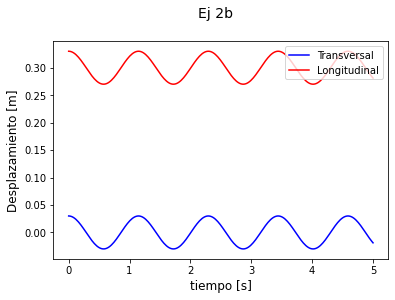

In [9]:
plt.suptitle('Ej 2b', 
                 fontsize=14, y=1)
plt.xlabel('tiempo [s]', fontsize=12)
plt.ylabel('Desplazamiento [m]', fontsize=12)
plot(t, psi_t.real, 'b', t, psi_l.real, 'r-')
legend(('Transversal', 'Longitudinal'),  #aca agrego la legenda y le digo en que posición de la figura quiero que esté.
prop = {'size': 10}, loc='upper right')


**SLIDER**

In [10]:
import ipywidgets as iwy

Para jugar un rato vamos a hacer un slider, que nos permitirá mirar como varía la frecuencia de oscilación con el valor de la constante del resorte.

In [11]:
def Longitudinal(k = 30.0): #valor en que aparece el slider por defecto. La función queda cargada hasta que yo la llame, dentro de la función tengo que poner todos los parámetros
  l= 0.3 #m
  A = 0.1*l #m 
  m = 1 #kg

  omega=np.sqrt(2*k/m)

  t= np.linspace(0,5,250) # aca le estamos diciendo que genere equispaciadamente 250 tiempos entre 0 y 5seg

  psi_l=A*np.sin(omega*t+pi/2)+l

  plt.suptitle('Ej 2b', 
                 fontsize=14, y=1)
  plt.xlabel('tiempo [s]', fontsize=12)
  plt.ylabel('Desp. osc. longitudinal [m]', fontsize=12)
  plt.plot(t, psi_l);


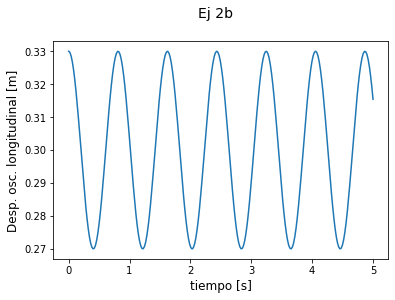

<function __main__.Longitudinal(k=30.0)>

In [14]:
iwy.interact(Longitudinal,k=(1,60,5)) #Armo un slider que vaya desde 1 a 60 de a pasos de a 5N/m y llamo a la función 